In [3]:
#Auto Encoder

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Reshape and normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

# Define the autoencoder model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))  # Encoder
model.add(Dense(16, activation='relu'))  # Latent space (compressed representation)
model.add(Dense(x_train.shape[1], activation='sigmoid'))  # Decoder

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model
model.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Encode and decode an image
encoded_imgs = model.predict(x_test)

# You can visualize the encoded_imgs and original images to see reconstruction quality

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.2594 - val_loss: 0.1901
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1742 - val_loss: 0.1614
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1550 - val_loss: 0.1476
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1457 - val_loss: 0.1412
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1398 - val_loss: 0.1366
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1365 - val_loss: 0.1337
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1342 - val_loss: 0.1318
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1327 - val_loss: 0.1307
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1317 - val_loss: 0.1299
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


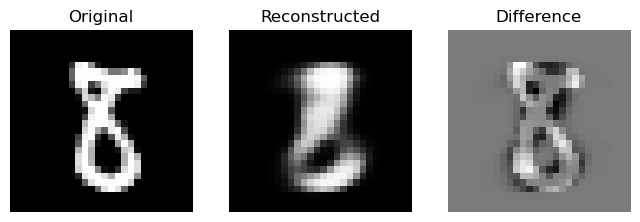

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_autoencoder(original, reconstructed):
  plt.figure(figsize=(8, 3))
  # Original image
  plt.subplot(1, 3, 1)
  plt.imshow(original.reshape(28, 28), cmap='gray')
  plt.title('Original')
  plt.axis('off')
  # Reconstructed image
  plt.subplot(1, 3, 2)
  plt.imshow(reconstructed.reshape(28, 28), cmap='gray')
  plt.title('Reconstructed')
  plt.axis('off')
  # Difference image
  difference = original - reconstructed
  plt.subplot(1, 3, 3)
  plt.imshow(difference.reshape(28, 28), cmap='gray')
  plt.title('Difference')
  plt.axis('off')
  plt.show()

# Select random test image for visualization
sample_index = np.random.randint(0, len(x_test))
original_image = x_test[sample_index]
reconstructed_image = encoded_imgs[sample_index]
visualize_autoencoder(original_image, reconstructed_image)